In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import data set

In [32]:
iris_df = pd.read_csv("iris.csv")

In [13]:
iris_df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


sepal_length, sepal_width, petal_length, petal_width are called feature/Input-variable/Independent-variable
Species are called Dependent-variable/Output-variable

In [16]:
iris_df.shape

(150, 5)

In [17]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [9]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### We have 150 rows and 5 cloumns

In [18]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

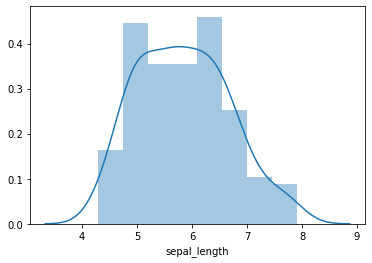

In [22]:
sns.distplot(iris_df['sepal_length'])

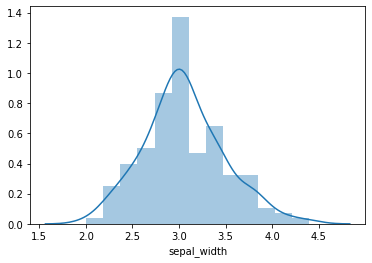

In [23]:
sns.distplot(iris_df['sepal_width'])

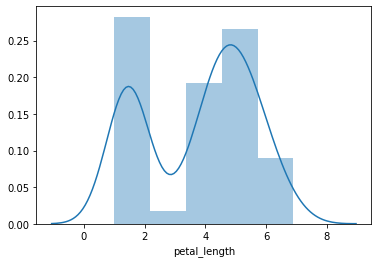

In [24]:
sns.distplot(iris_df['petal_length'])

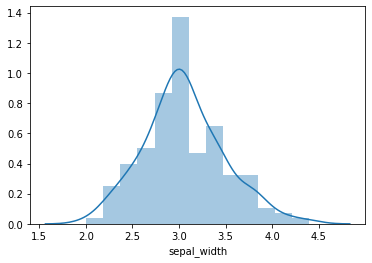

In [25]:
sns.distplot(iris_df['sepal_width'])

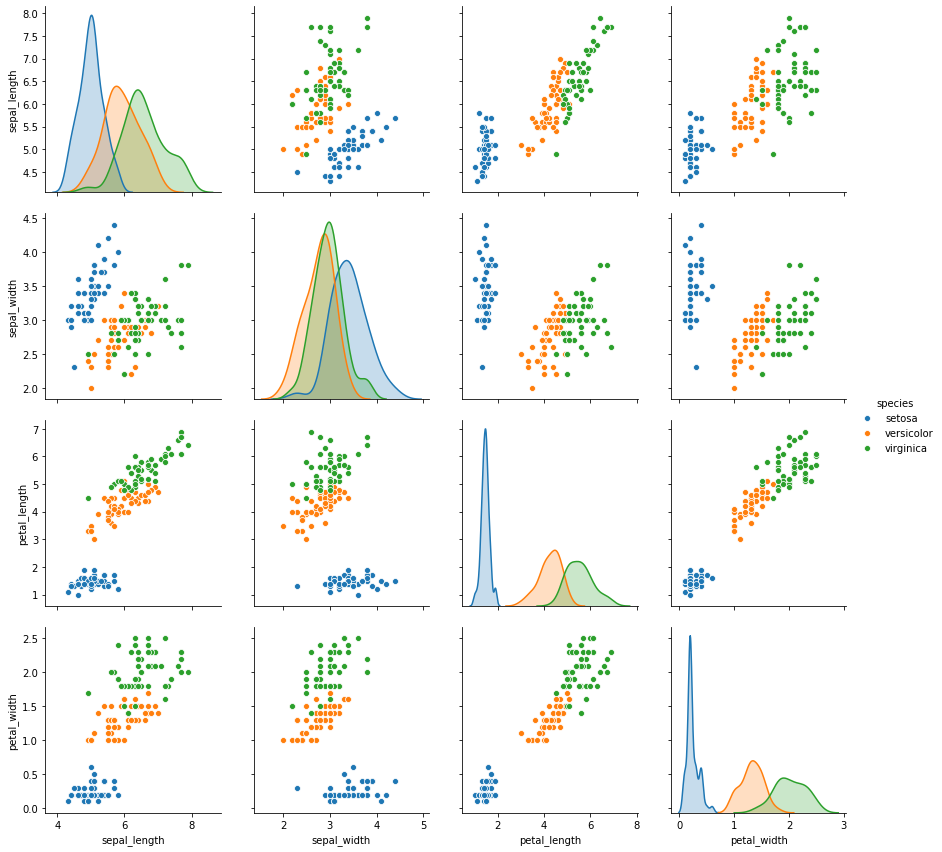

In [27]:
sns.pairplot(iris_df,hue="species", size=3)

## K means clustering

Let's drop species column from data to find the optimul k value

In [33]:
iris_df = iris_df.drop("species",axis=1)

In [49]:
x = iris_df.iloc[:, [0,1,2, 3]].values

In [50]:
from sklearn.cluster import KMeans

WSS = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, random_state=123).fit(x)
    WSS.append(kmeans.inertia_)  # inertia has the overall WSS


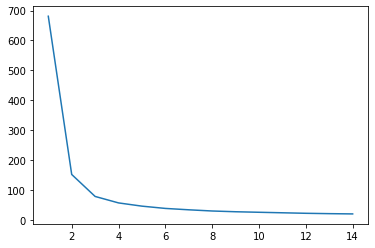

In [51]:
import seaborn as sns
sns.lineplot(x=range(1,15), y= WSS)

based on plotted elbow method lets consider k = 3

## Training data

In [52]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,max_iter = 300, n_init = 10, random_state = 0).fit(x)

## Predict the data

In [53]:
y_kmeans = kmeans.fit_predict(x)

In [54]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

# Visualising the clusters


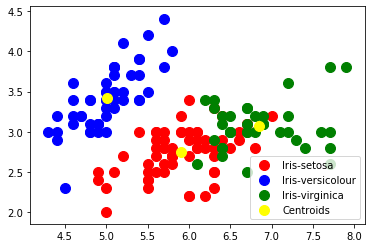

In [55]:

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [58]:
from sklearn.metrics import silhouette_score 
silhouette_score(x,kmeans.labels_)

0.5525919445499757

## Conclusion

We observed that the model that predicts species of iris flowers. We noticed that the "Iris-versicolor" is separable and "Iris-setosa" and "Iris-virginica" are not separable on K-Means algorithm. 